In [17]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

darks=['#ff7200', '#984ea3', '#7fc97f', '#3a80b0', '#e261b0']
pastels=['#fed9a6','#decbe4','#ccebc5', '#b3cde3', '#f4cae4']
superdarks=['#ee4e00', '#771e85', '#41ab5d', '#1f5a82', '#cf3092']
d=.19
ms=10
lw=3
mew=2
w=.65
mfc=ec
mc='black'
x=3.4
fs=24
# set the font name for a font family
plt.rcParams.update({'font.sans-serif':'Arial'})

In [21]:
df=pd.read_csv('counts_fig4.csv')
# df.head()


#changes 0's to 1e-9 for plotting purposes
baseline=1e-9
columns=['A1', 'C1', 'G1', 'T1', 'd1', 'm1', 'u1', 
         'A2', 'C2', 'G2', 'T2', 'd2', 'm2', 'u2', 
         'A3', 'C3', 'G3', 'T3', 'd3', 'm3', 'u3', 
         'A_aver', 'C_aver', 'G_aver', 'T_aver', 'd_aver', 'm_aver', 'u_aver']

for column in columns:
    df[column]=[baseline if x==0 else x for x in df[column]]

df.head()

,sample,A1,C1,G1,T1,d1,m1,u1,A2,C2,...,Unnamed: 30,Unnamed: 31,SNP1,mut1,SNP2,mut2,SNP3,mut3,SNP_aver,mut_aver
0,A_HG,1.000000e-09,1.000000e-09,5.560000e-08,1.000000e-09,8.330000e-08,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,...,NaN,NaN,5.560000e-08,8.330000e-08,9.580000e-09,5.750000e-08,0.000000e+00,3.570000e-08,2.170000e-08,5.880000e-08
1,A_neg,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,...,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,5.770000e-08,0.000000e+00,8.940000e-09,0.000000e+00,2.220000e-08
2,A_pos,1.000000e-09,1.000000e-09,1.000000e-09,1.150000e-07,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,...,NaN,NaN,1.150000e-07,0.000000e+00,0.000000e+00,1.220000e-07,8.060000e-07,2.780000e-08,3.070000e-07,4.990000e-08
3,C_HG,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,3.680000e-08,...,NaN,NaN,0.000000e+00,0.000000e+00,3.680000e-08,1.230000e-08,2.920000e-08,2.920000e-08,2.200000e-08,1.380000e-08
4,C_neg,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,4.300000e-08,1.000000e-09,1.080000e-08,1.000000e-09,1.000000e-09,...,NaN,NaN,0.000000e+00,4.300000e-08,0.000000e+00,1.750000e-08,0.000000e+00,8.660000e-09,0.000000e+00,2.300000e-08


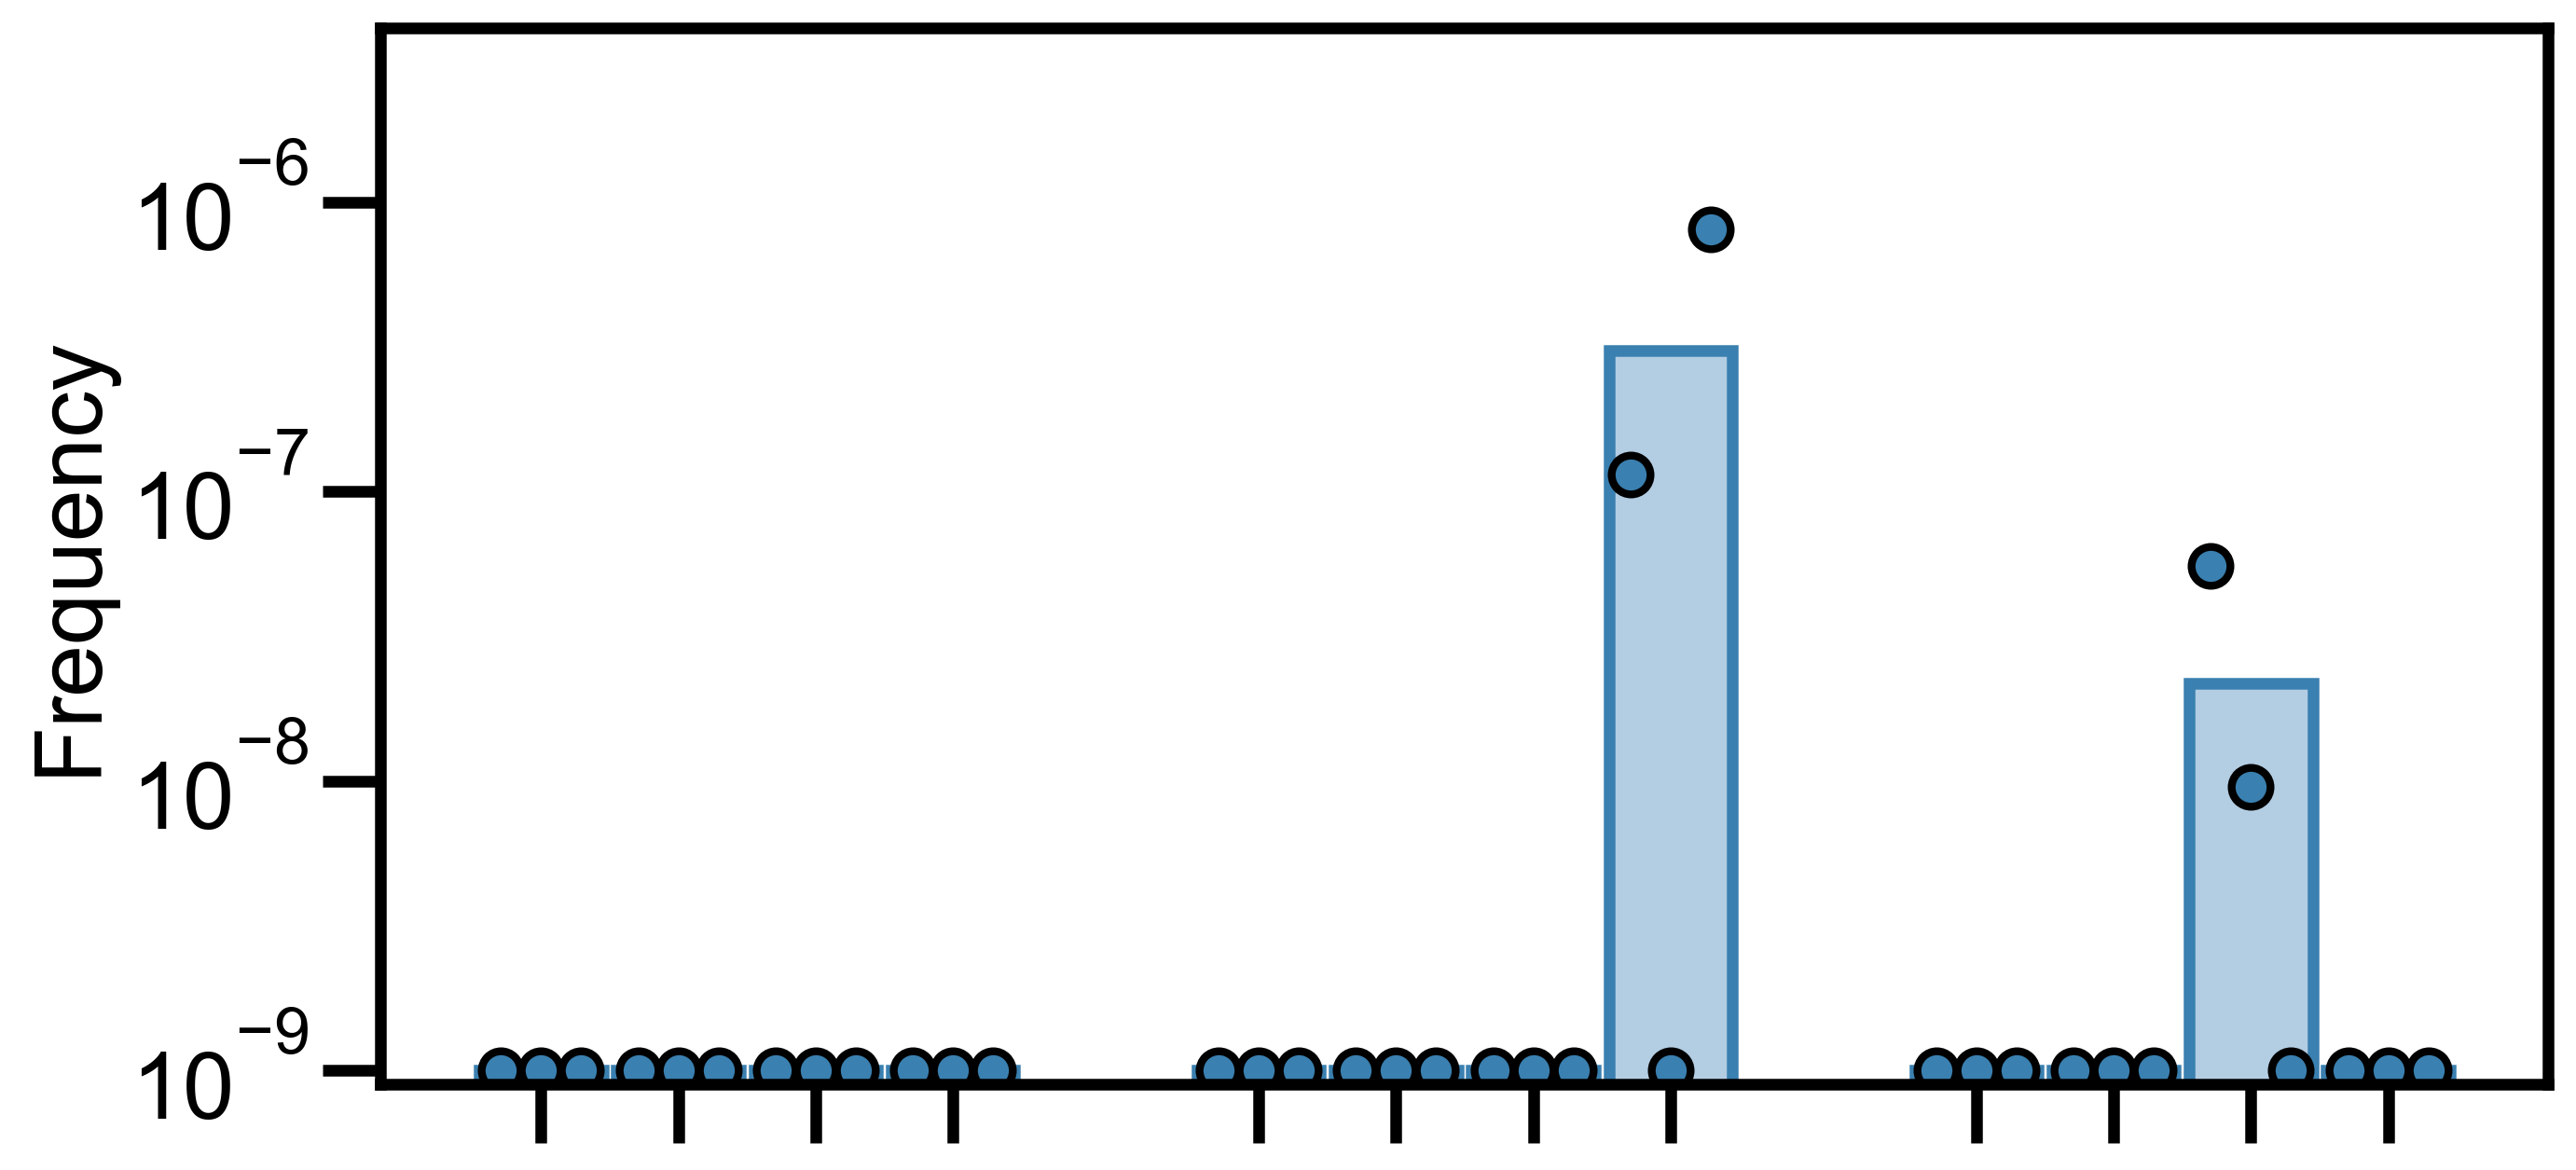

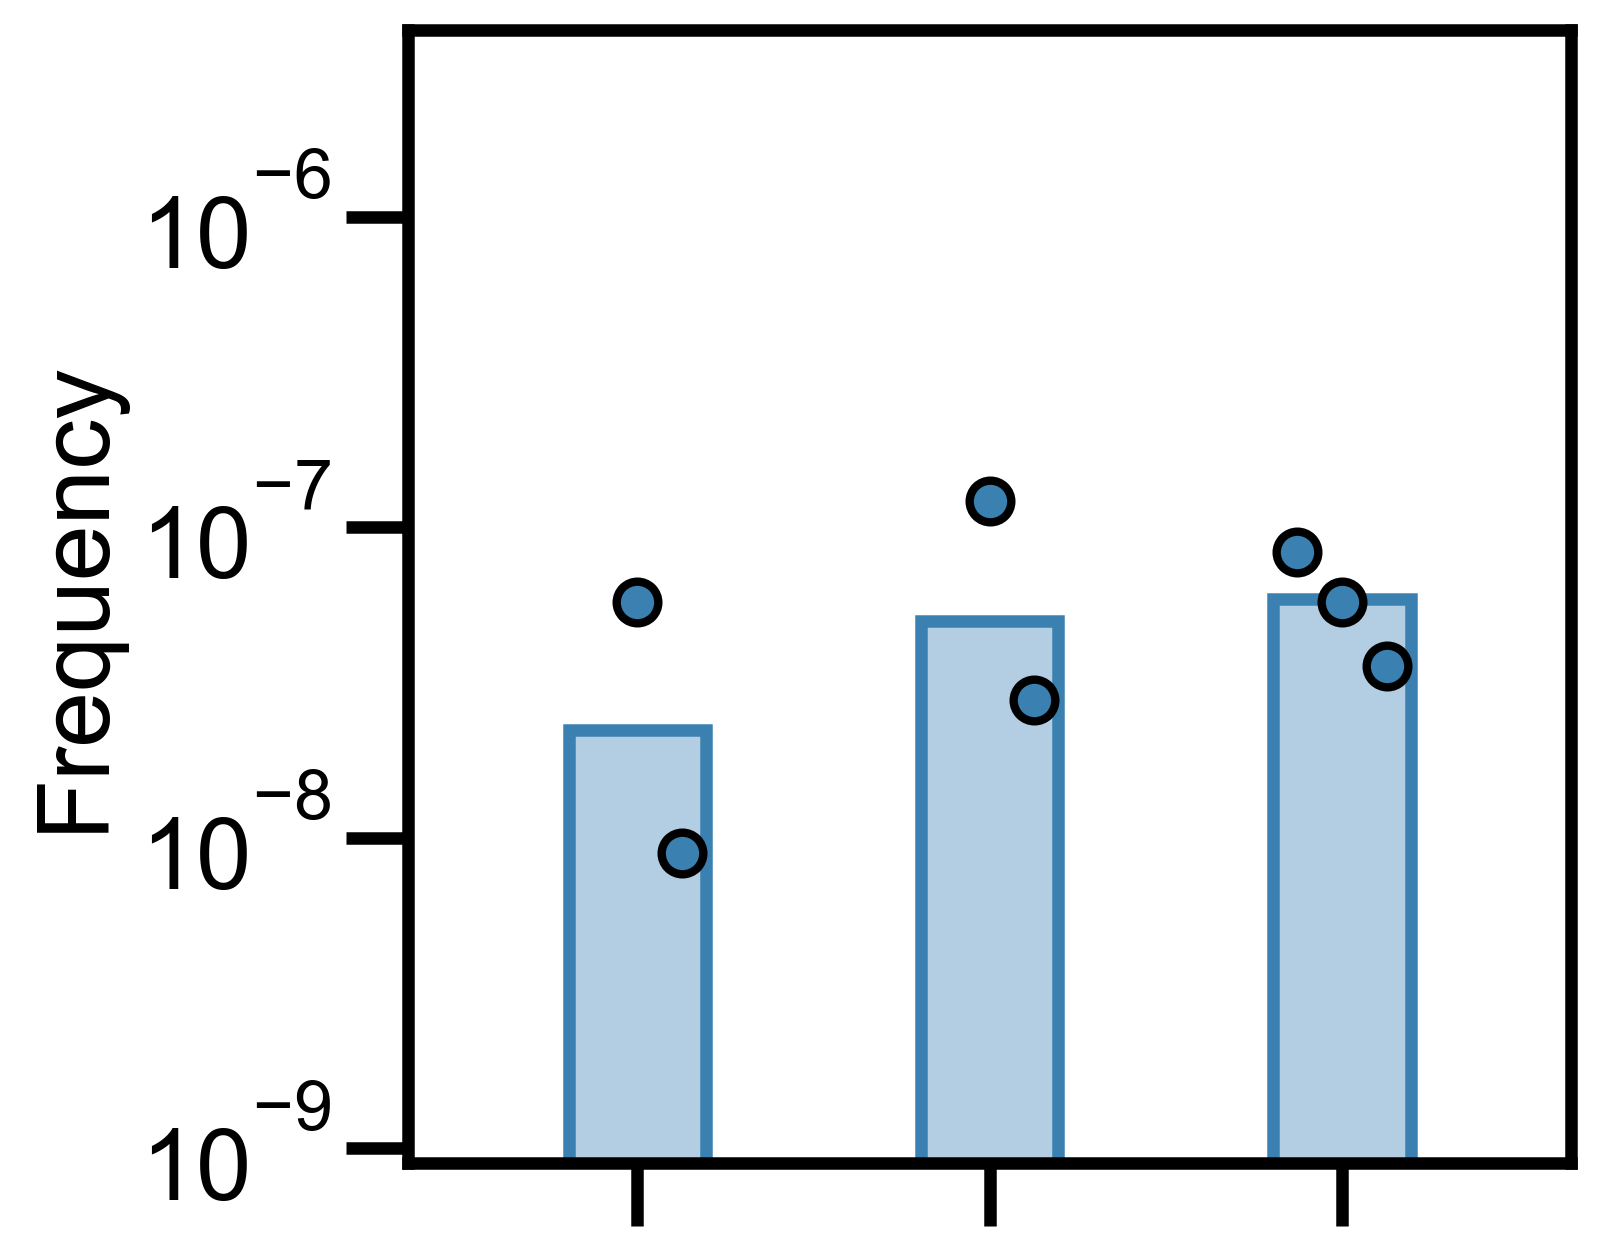

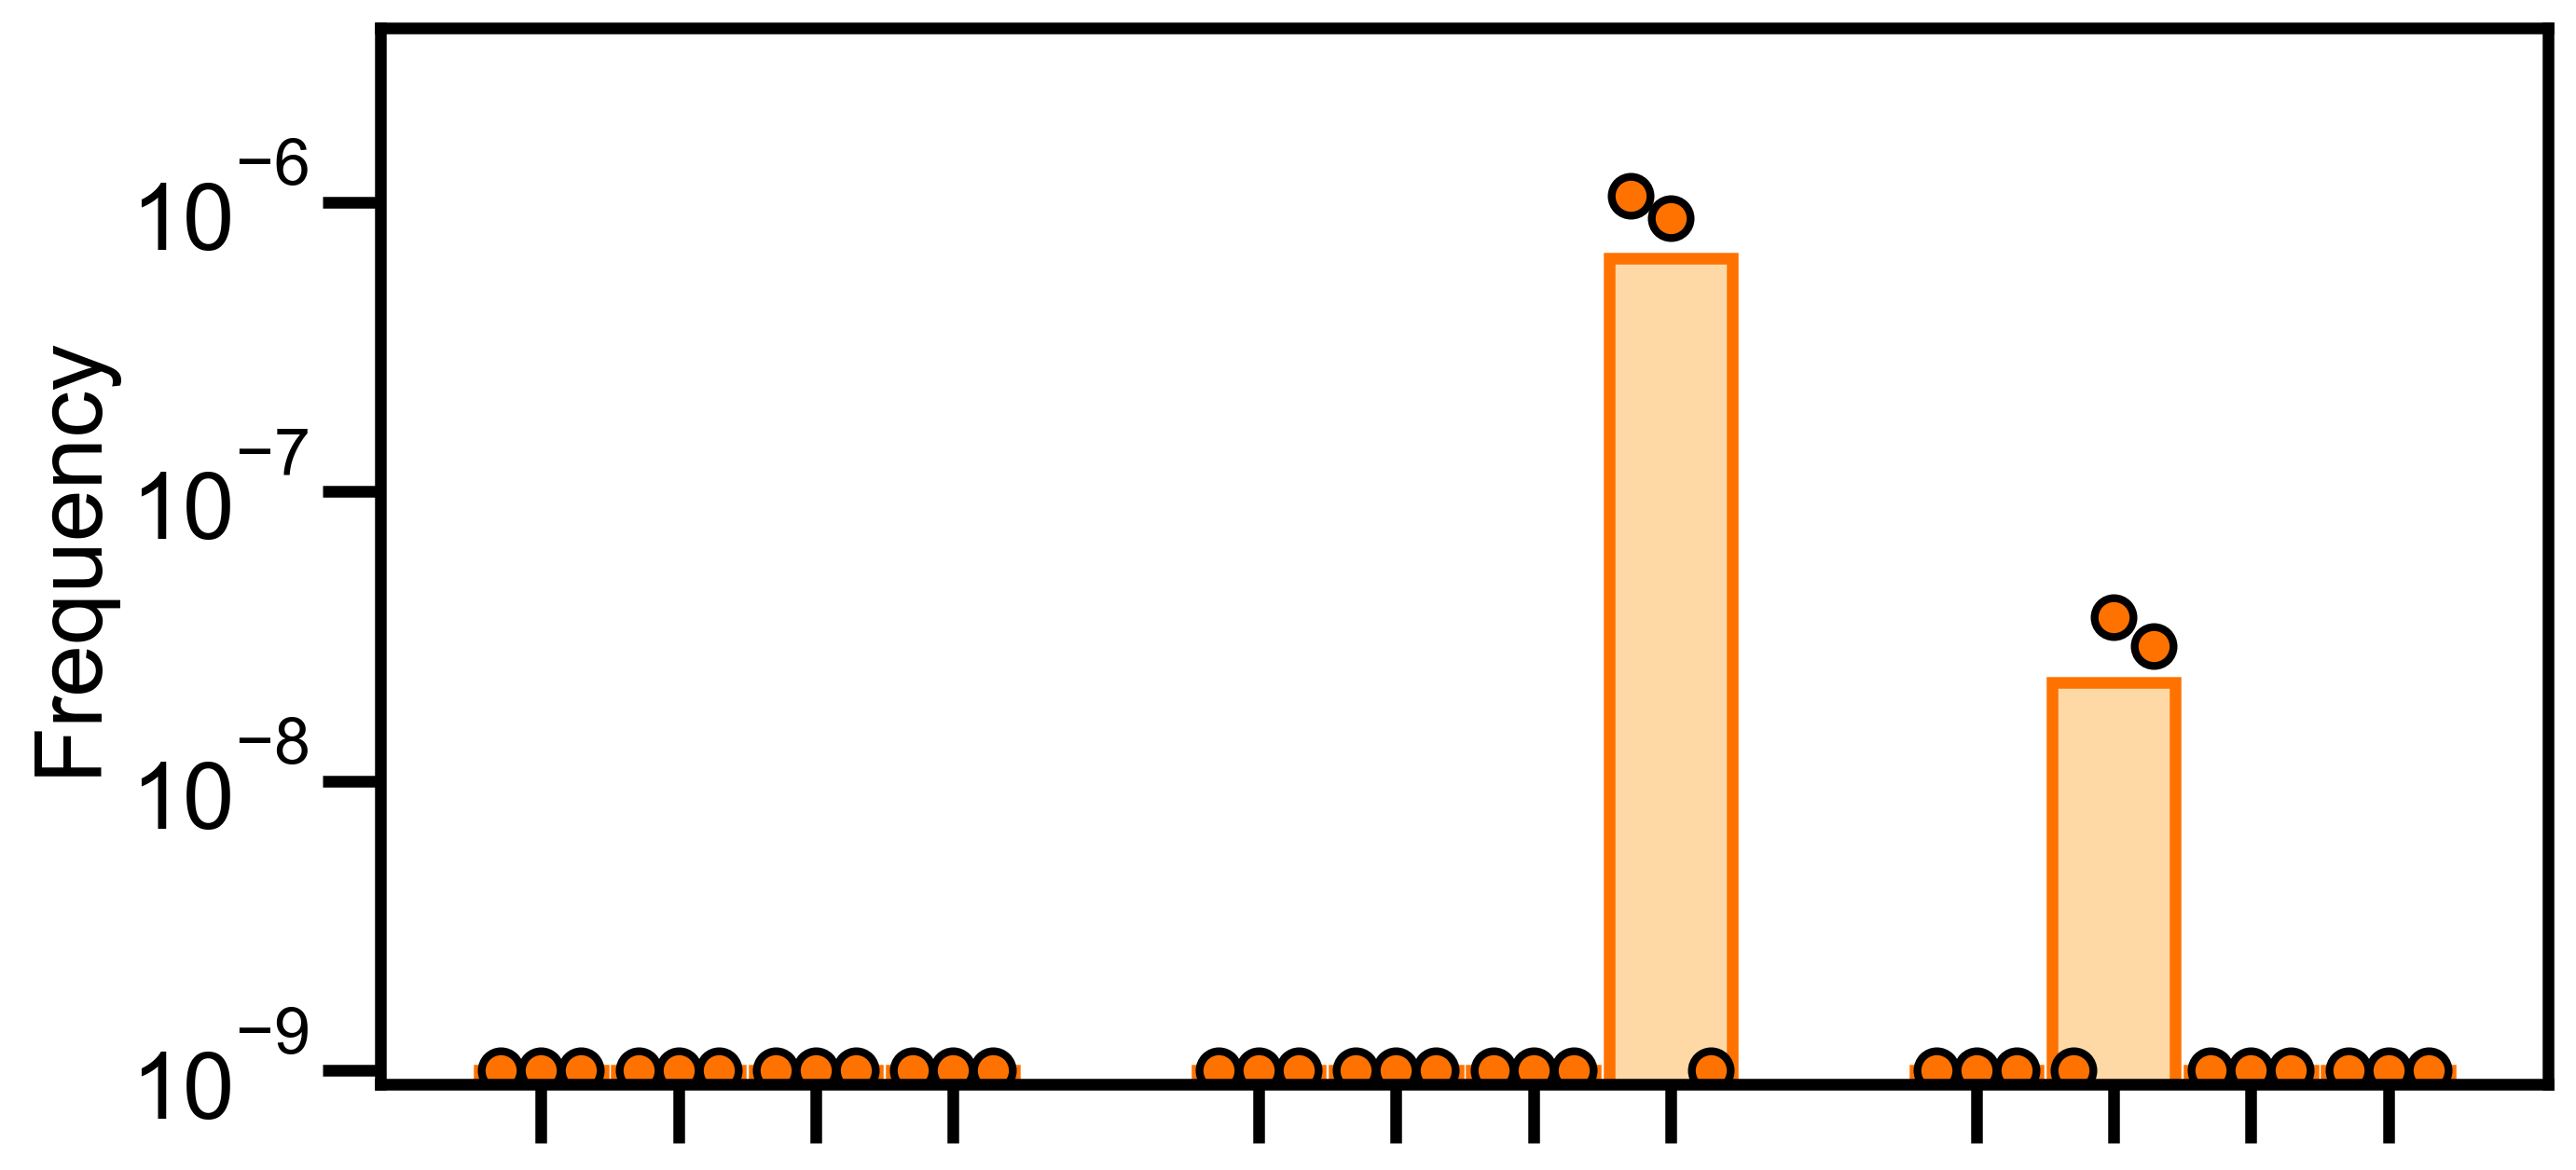

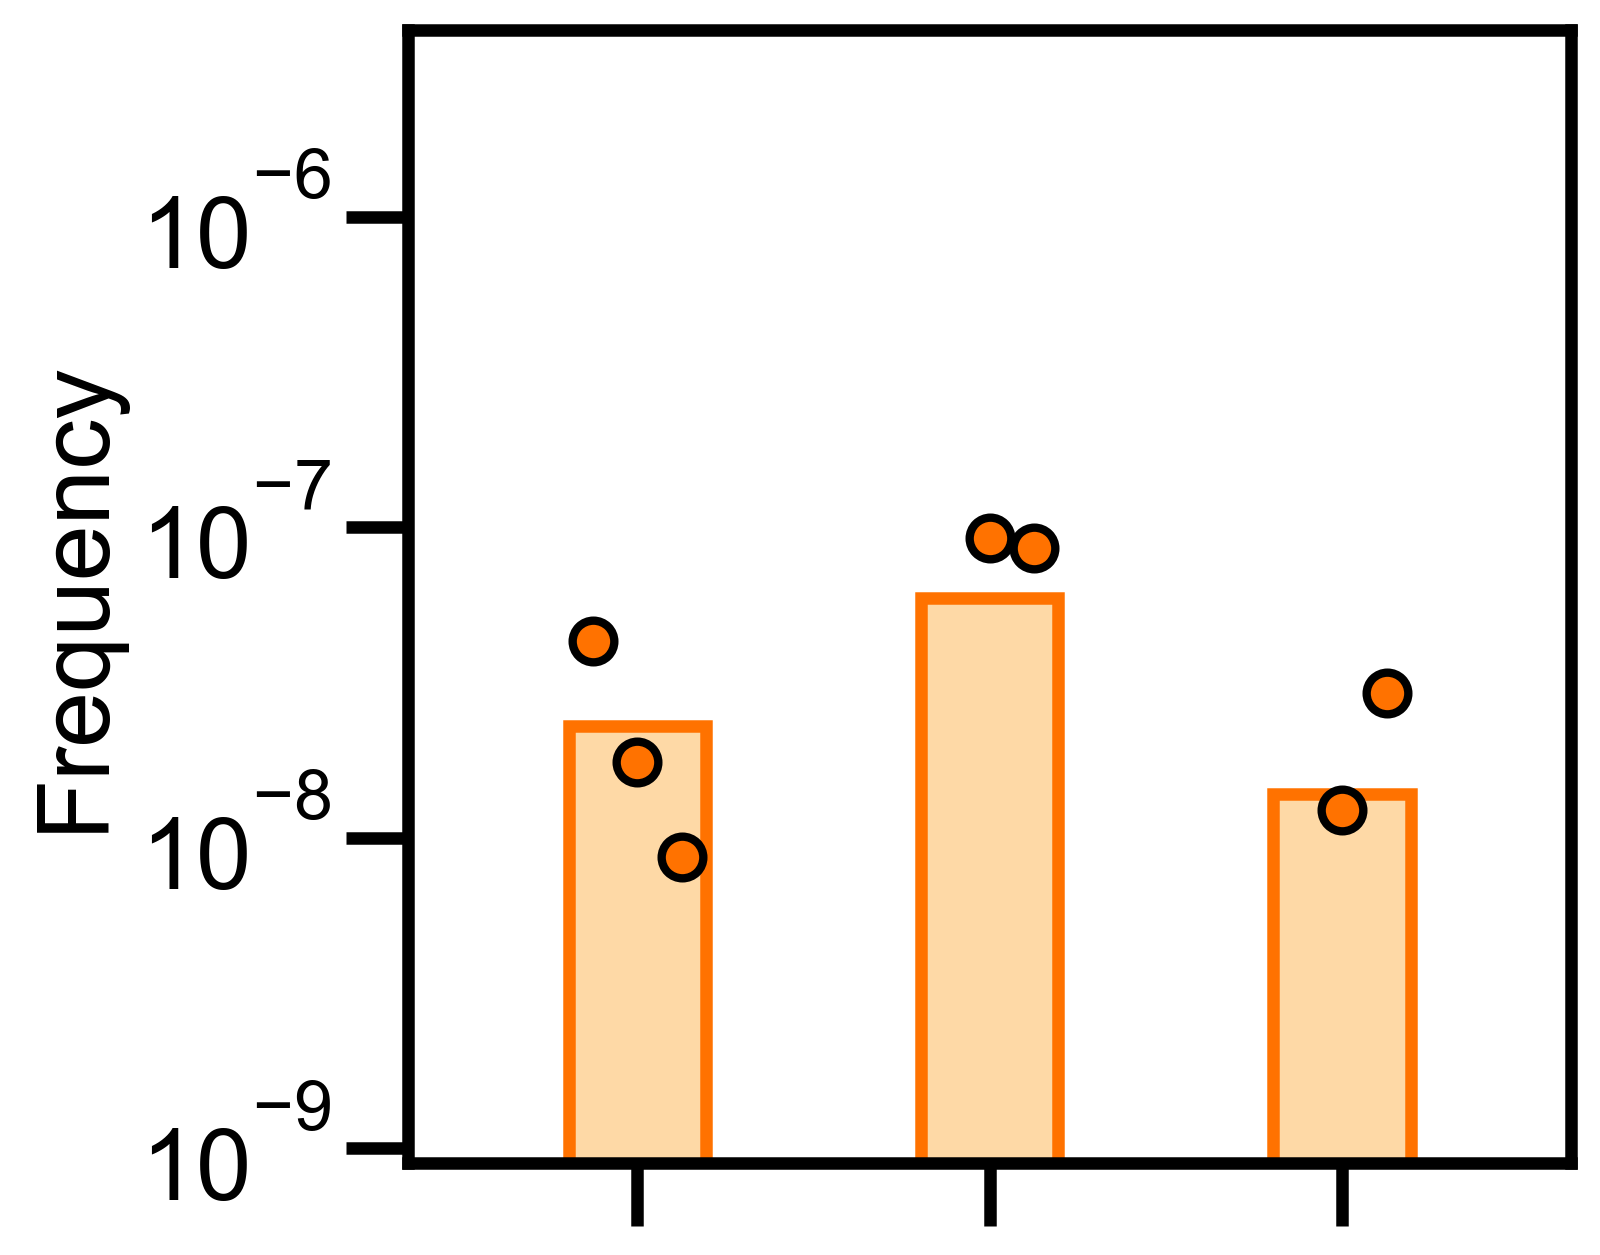

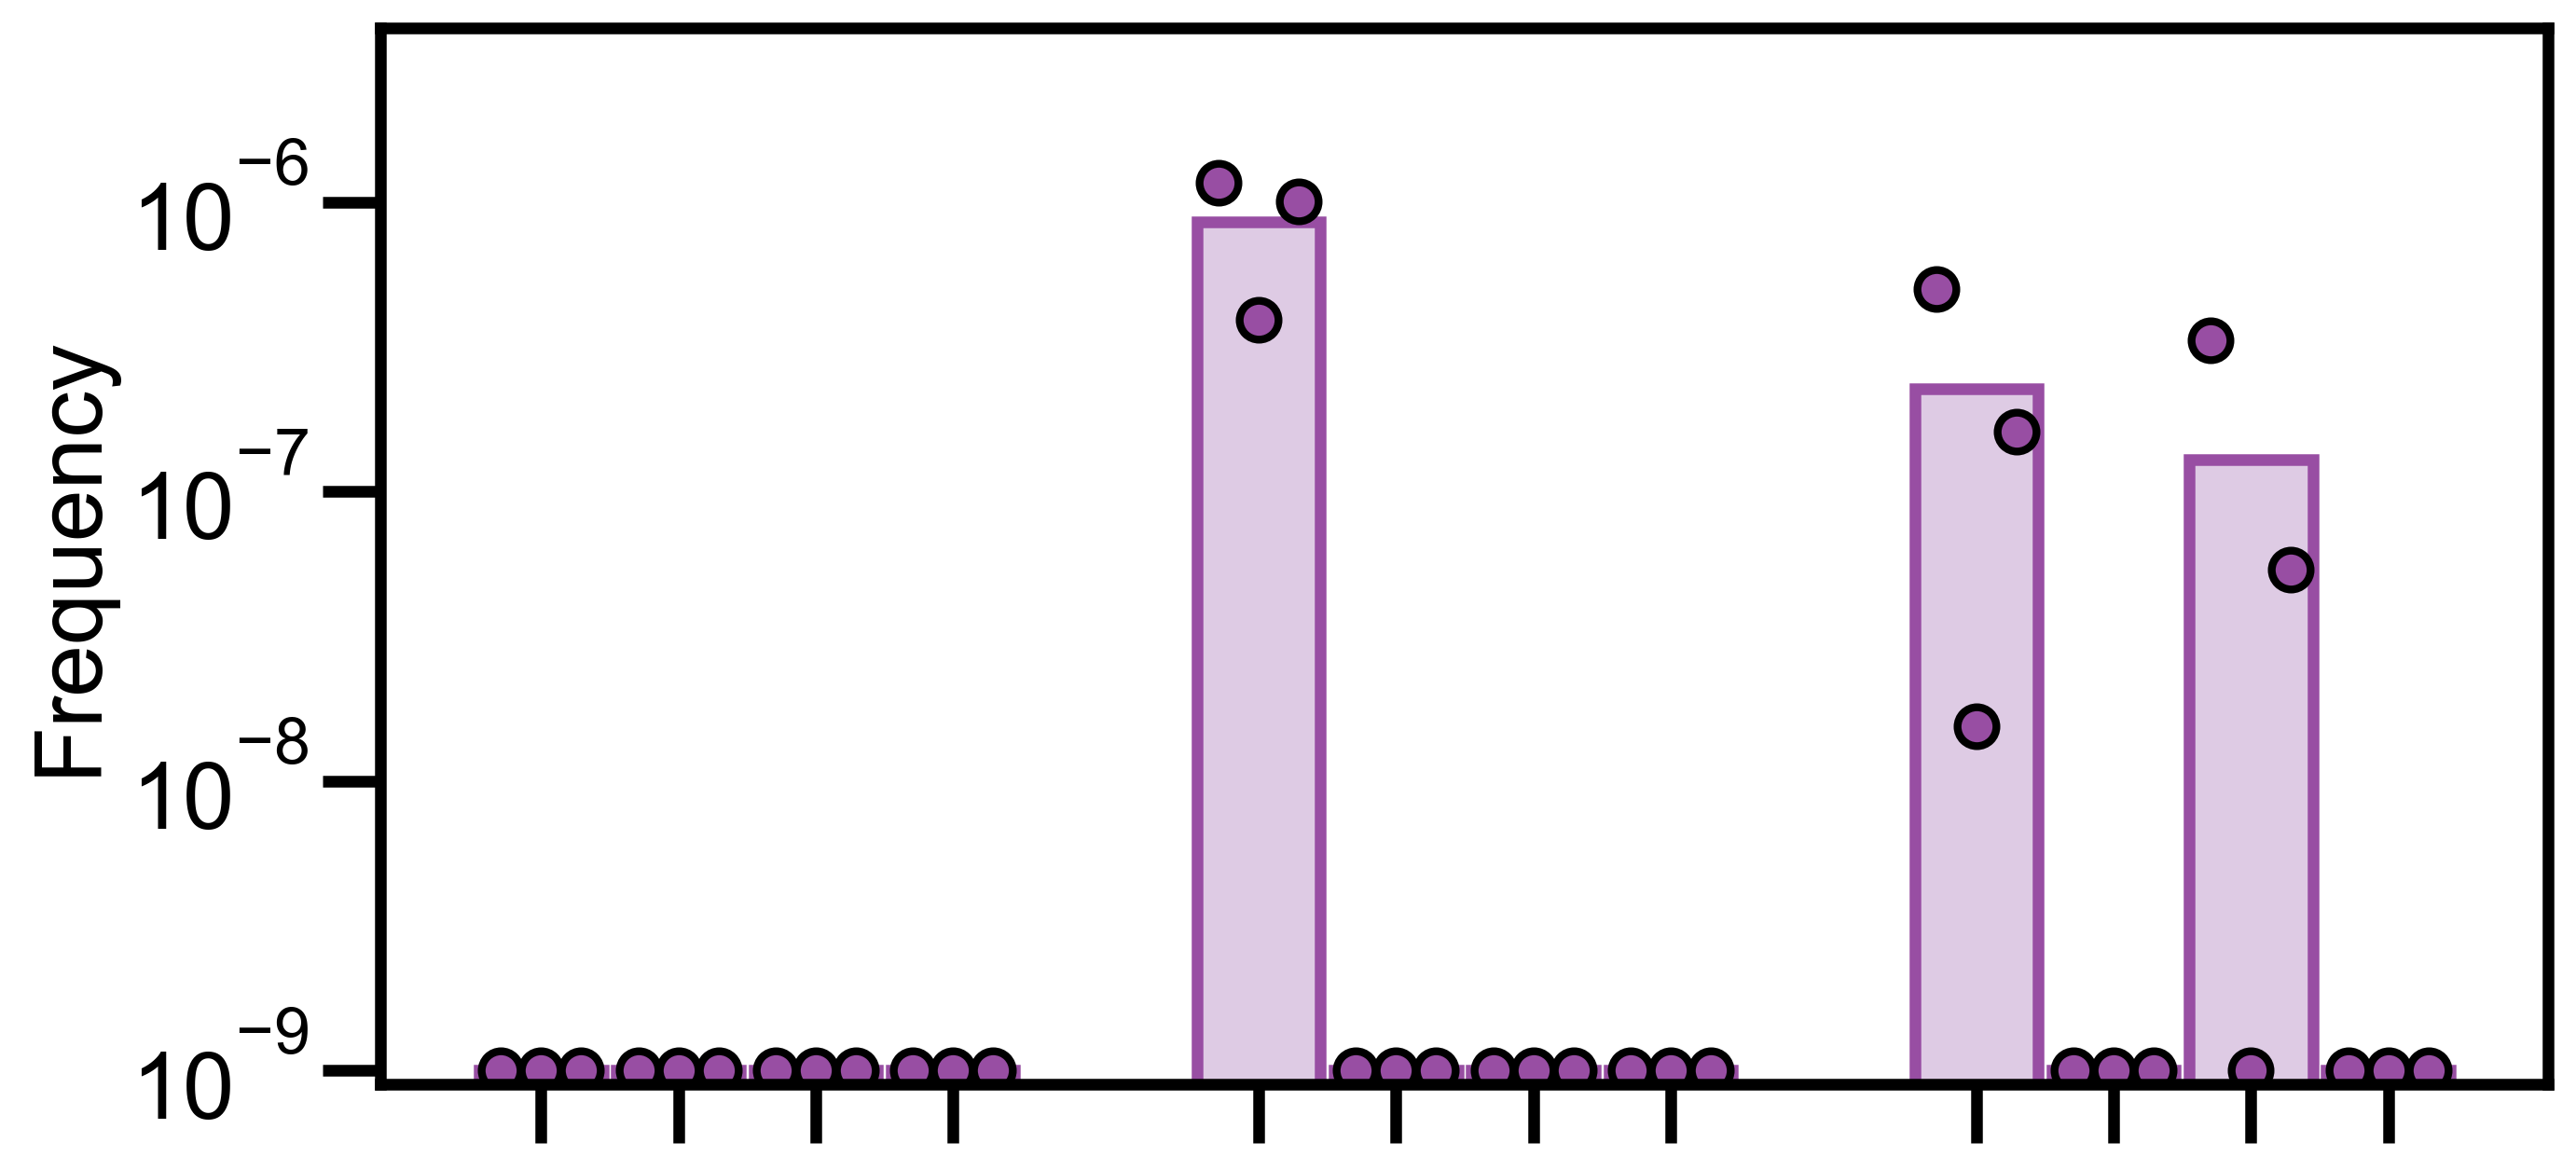

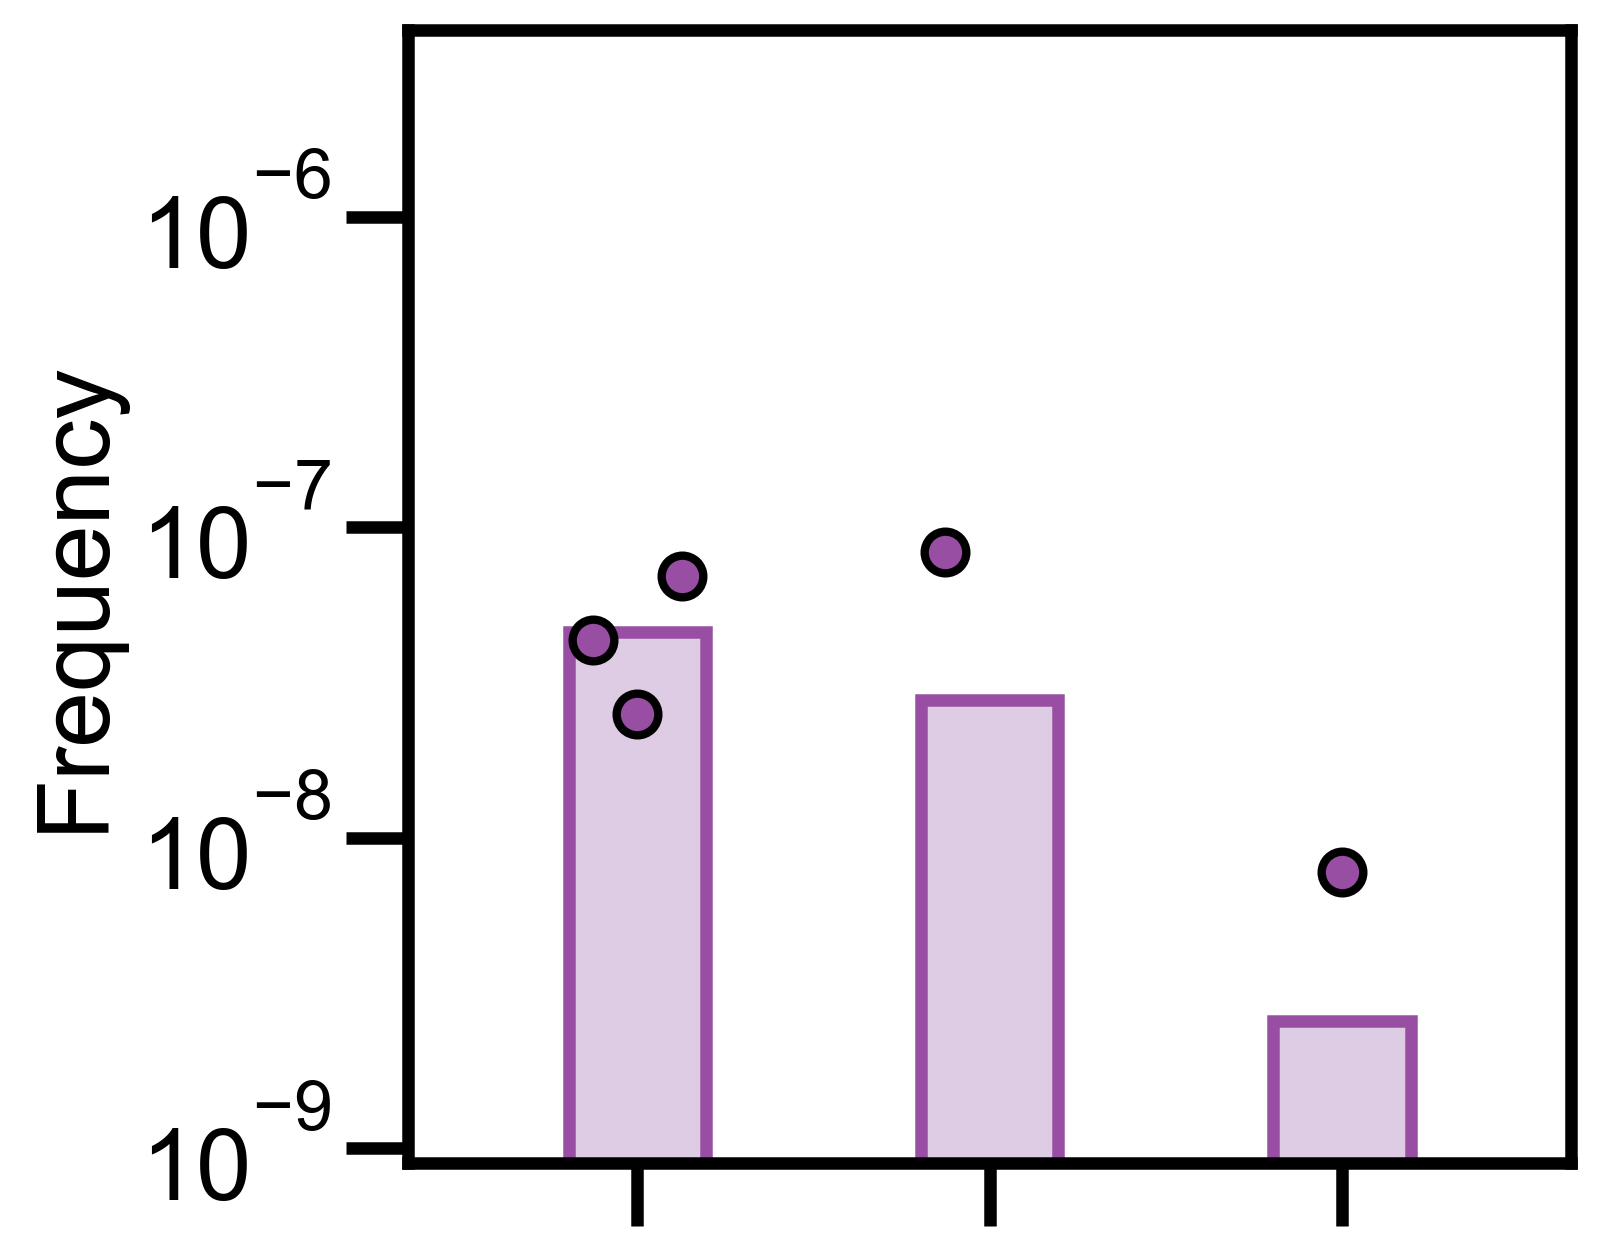

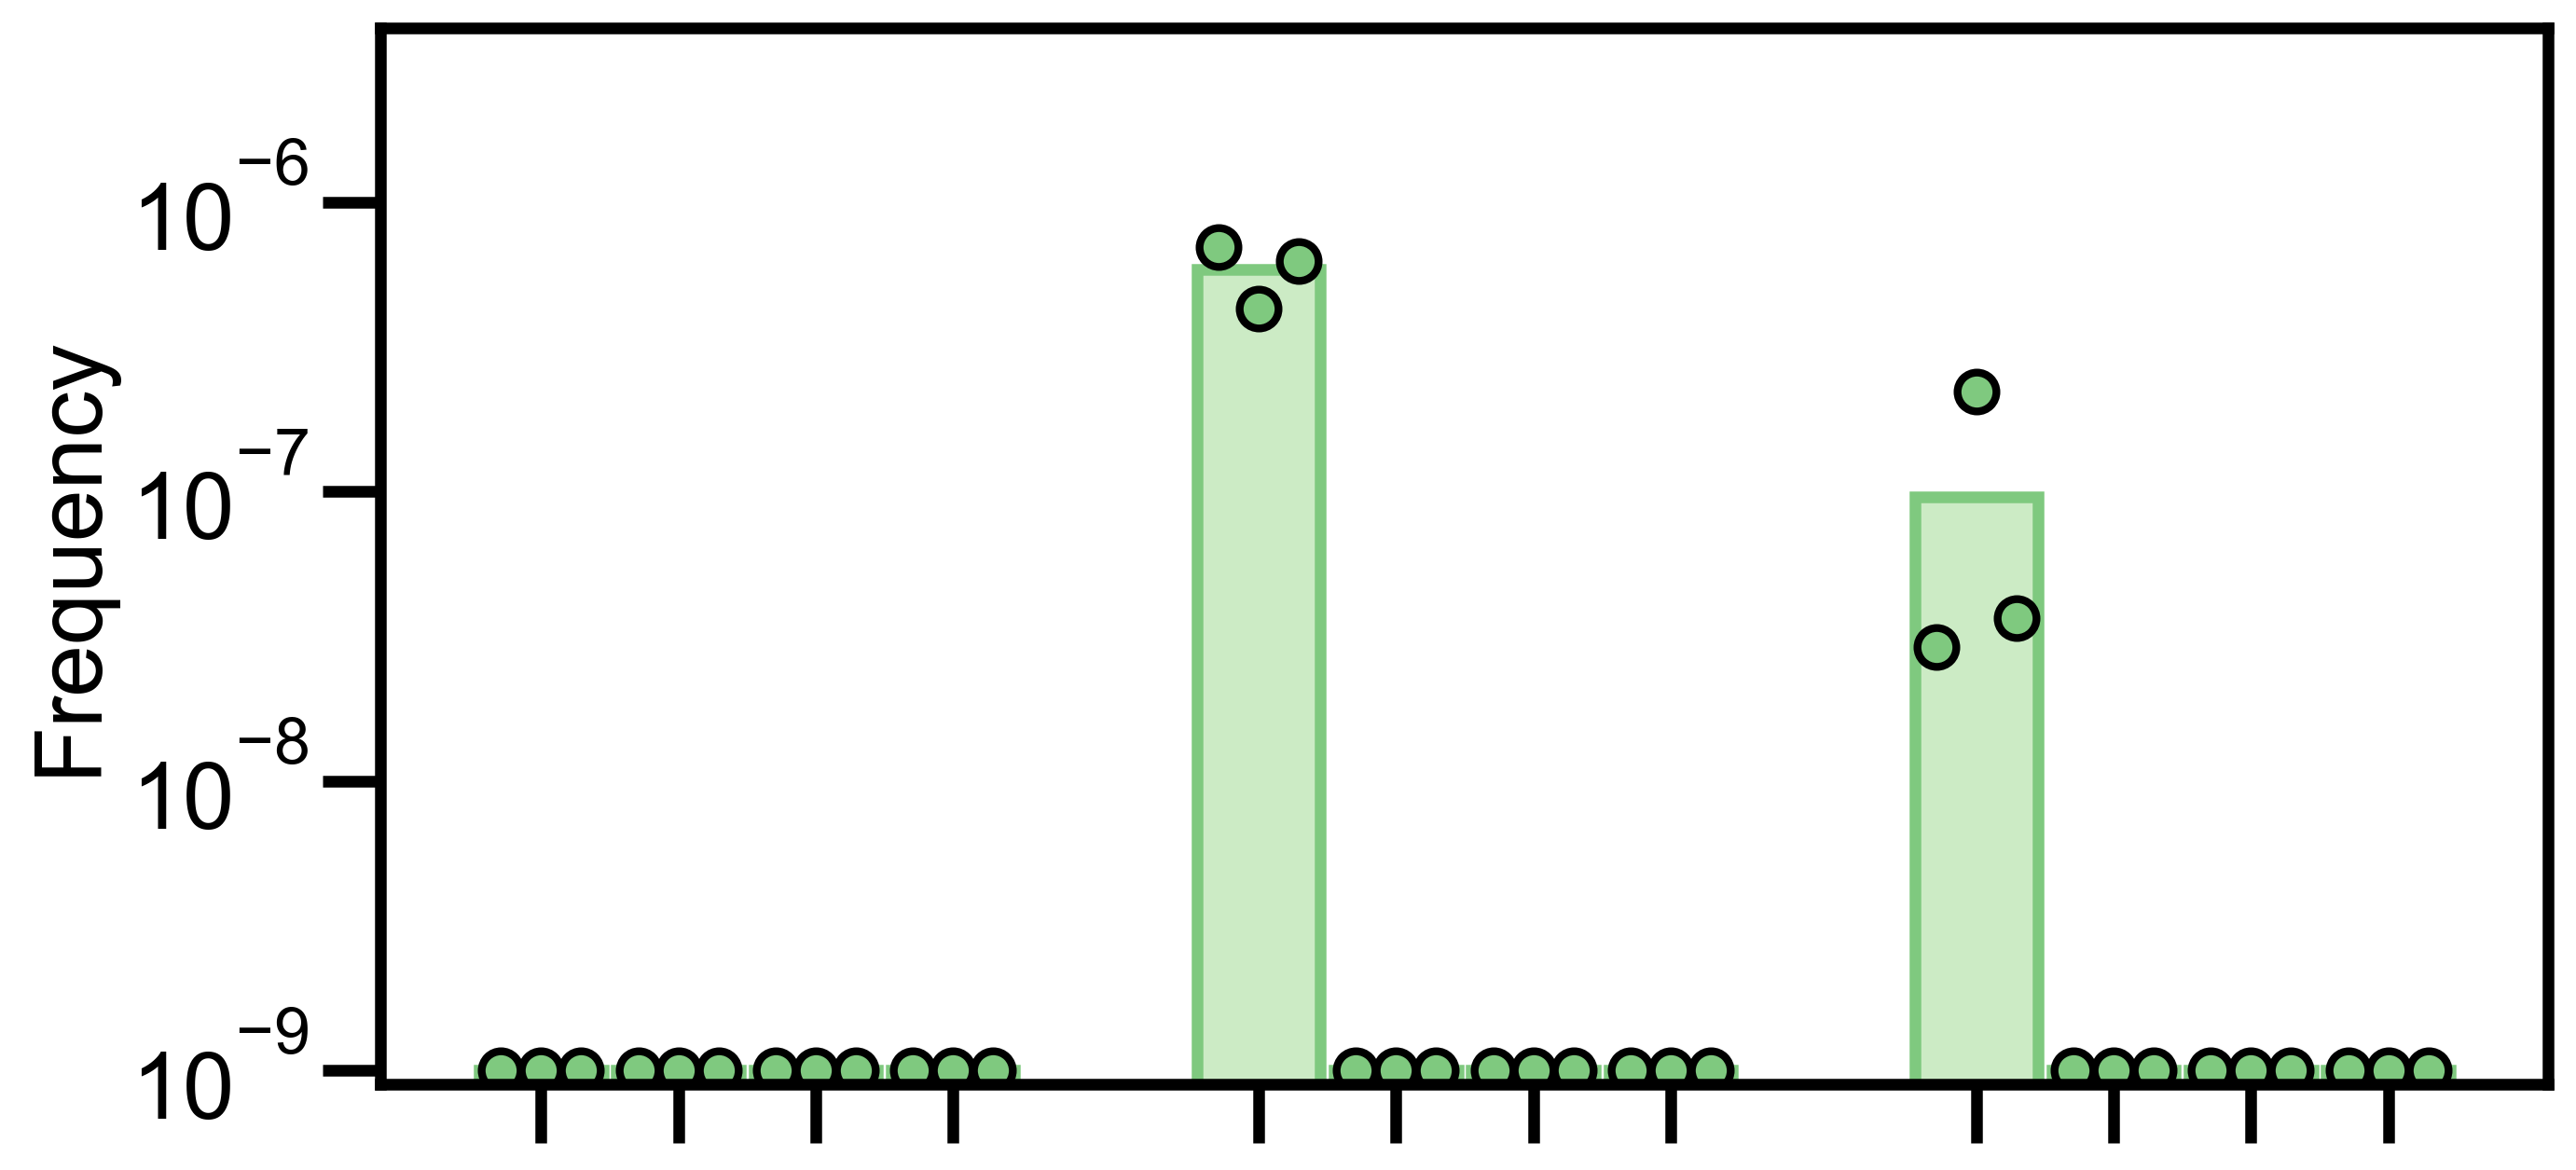

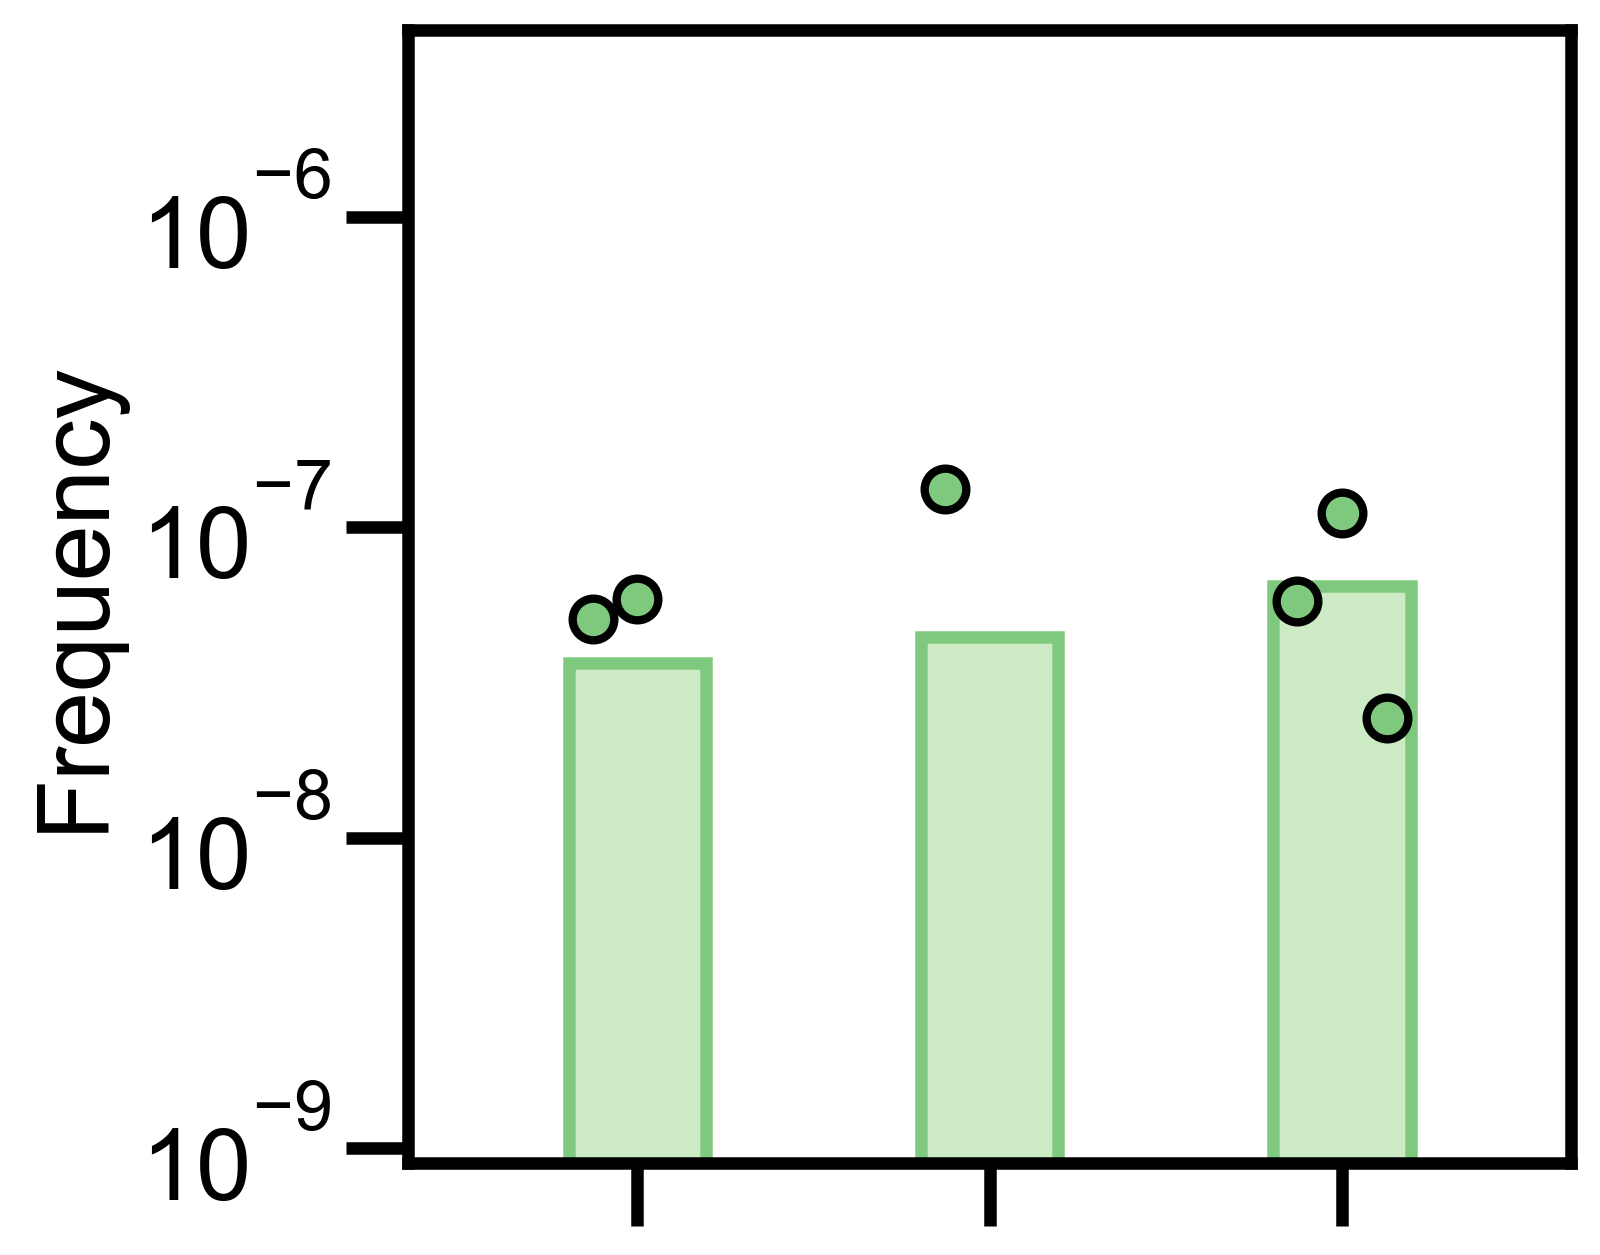

In [20]:
for seq, ind in zip(['A', 'C', 'D', 'E'], [3, 0, 1, 2]):
    HG=seq+'_HG'
    neg=seq+'_neg'
    pos=seq+'_pos'
    title=seq+'_distr.pdf'
    ec=darks[ind]
    fc=pastels[ind]

    fig, ax=plt.subplots(figsize=(10,5), dpi=300)

    for i, name in zip(w*np.arange(4), ['A', 'C', 'G', 'T']):
        ax.bar(i, df.loc[df['sample']==neg, name+'_aver'], facecolor=fc, edgecolor=ec, width=w*.9, linewidth=lw)
        ax.plot(i-d, df.loc[df['sample']==neg, name+'1'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
        ax.plot(i, df.loc[df['sample']==neg, name+'2'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
        ax.plot(i+d, df.loc[df['sample']==neg, name+'3'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)

    for i, name in zip(x+w*np.arange(4), ['A', 'C', 'G', 'T']):
        ax.bar(i, df.loc[df['sample']==pos, name+'_aver'], facecolor=fc, edgecolor=ec, width=w*.9, linewidth=lw)
        ax.plot(i-d, df.loc[df['sample']==pos, name+'1'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
        ax.plot(i, df.loc[df['sample']==pos, name+'2'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
        ax.plot(i+d, df.loc[df['sample']==pos, name+'3'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)

    for i, name in zip(2*x+w*np.arange(4), ['A', 'C', 'G', 'T']):
        ax.bar(i, df.loc[df['sample']==HG, name+'_aver'], facecolor=fc, edgecolor=ec, width=w*.9, linewidth=lw)
        ax.plot(i-d, df.loc[df['sample']==HG, name+'1'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
        ax.plot(i, df.loc[df['sample']==HG, name+'2'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
        ax.plot(i+d, df.loc[df['sample']==HG, name+'3'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)

    # ax.set_xlim(-2*w, 2*x-w)
    xticks=[0, w, 2*w, 3*w, x, x+w, x+2*w, x+3*w, 2*x, 2*x+w, 2*x+2*w, 2*x+3*w]
    ax.set_xticks(xticks)
    ax.set_xticklabels([])
    # ax.set_xticklabels(['A', 'C', 'G', 'T', 'mut', 'A', 'C', 'G', 'T', 'mut'])
    ax.set_yscale('log')
    ax.set_ylim(baseline*.9, 4e-6)

    # ax.set_yticklabels(['$0$','$10^{-8}$','$10^{-7}$','$10^{-6}$','$10^{-5}$']) #change manually
    ax.set_yticks([1e-9, 1e-8, 1e-7, 1e-6]) #change manually
    ax.tick_params(which='major', direction='out', length=15, width=3)
    ax.tick_params(which='minor', direction='out', length=0, width=3)
    ax.tick_params(axis='both', which='major', labelsize=fs)
    ax.set_ylabel('Frequency', fontsize=fs, fontname='Arial')

    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(lw)
        ax.spines[axis].set_color('black')

    # labels = ax.get_yticks()
    # labels[0]=0
    # ax.annotate('0', xy=(-2*w, baseline), xytext=(-4*w, baseline/1.3), fontsize=fs)

    for tick in ax.get_xticklabels():
        tick.set_fontname('Arial')
        tick.set_fontsize(fs)
    for tick in ax.get_yticklabels():
        tick.set_fontname('Arial')
        tick.set_fontsize(fs)

    plt.show()
    plt.tight_layout()
#     fig.savefig('SNP_'+title, bbox_inches='tight')
    plt.close()
    
    

    fig, ax=plt.subplots(figsize=(5,5), dpi=300)

    i=0
    ax.bar(i, df.loc[df['sample']==neg, 'mut_aver'], facecolor=fc, edgecolor=ec, width=w*.9, linewidth=lw)
    ax.plot(i-d, df.loc[df['sample']==neg, 'mut1'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
    ax.plot(i, df.loc[df['sample']==neg, 'mut2'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
    ax.plot(i+d, df.loc[df['sample']==neg, 'mut3'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)

    i=1.5
    ax.bar(i, df.loc[df['sample']==pos,'mut_aver'], facecolor=fc, edgecolor=ec, width=w*.9, linewidth=lw)
    ax.plot(i-d, df.loc[df['sample']==pos, 'mut1'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
    ax.plot(i, df.loc[df['sample']==pos,'mut2'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
    ax.plot(i+d, df.loc[df['sample']==pos,'mut3'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)

    i=3
    ax.bar(i, df.loc[df['sample']==HG,'mut_aver'], facecolor=fc, edgecolor=ec, width=w*.9, linewidth=lw)
    ax.plot(i-d, df.loc[df['sample']==HG, 'mut1'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
    ax.plot(i, df.loc[df['sample']==HG,'mut2'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
    ax.plot(i+d, df.loc[df['sample']==HG, 'mut3'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)

    ax.set_xlim(-1.5*w, 3+1.5*w)
    ax.set_xticks([0, 1.5, 3])
    ax.set_xticklabels([])
    ax.set_yscale('log')
    ax.set_ylim(baseline*.9, 4e-6)

    ax.set_yticks([1e-9, 1e-8, 1e-7, 1e-6]) #change manually
    ax.tick_params(which='major', direction='out', length=15, width=3)
    ax.tick_params(which='minor', direction='out', length=0, width=3)
    ax.tick_params(axis='both', which='major', labelsize=fs)
    ax.set_ylabel('Frequency', fontsize=fs, fontname='Arial')

    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(lw)
        ax.spines[axis].set_color('black')

    for tick in ax.get_xticklabels():
        tick.set_fontname('Arial')
        tick.set_fontsize(fs)
    for tick in ax.get_yticklabels():
        tick.set_fontname('Arial')
        tick.set_fontsize(fs)

    plt.show()
    plt.tight_layout()
#     fig.savefig('del_'+title, bbox_inches='tight')
    plt.close()

In [23]:
df=pd.read_csv('counts_fig4_SEN5.csv')
# df.head()

baseline=1e-9
columns=['A1', 'C1', 'G1', 'T1', 'd1', 'm1', 'u1', 
         'A2', 'C2', 'G2', 'T2', 'd2', 'm2', 'u2', 
         'A3', 'C3', 'G3', 'T3', 'd3', 'm3', 'u3', 
         'A_aver', 'C_aver', 'G_aver', 'T_aver', 'd_aver', 'm_aver', 'u_aver']

for column in columns:
    df[column]=[baseline if x==0 else x for x in df[column]]

df.head()

,sample,TF_1,TF_2,TF_3,TF_aver,A1,A2,A3,A_aver,C1,...,d3,d_aver,m1,m2,m3,m_aver,u1,u2,u3,u_aver
0,F_neg,1.630000e-08,5.260000e-08,3.140000e-08,3.340000e-08,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,...,3.140000e-08,3.340000e-08,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09
1,F_pos,4.860000e-07,1.200000e-07,3.510000e-08,2.140000e-07,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,...,3.510000e-08,4.770000e-08,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,5.410000e-08,1.000000e-09,1.000000e-09,1.800000e-08
2,F_HG,4.170000e-08,1.670000e-07,5.450000e-08,8.760000e-08,1.000000e-09,1.000000e-09,1.210000e-08,4.040000e-09,1.000000e-09,...,4.240000e-08,6.970000e-08,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09


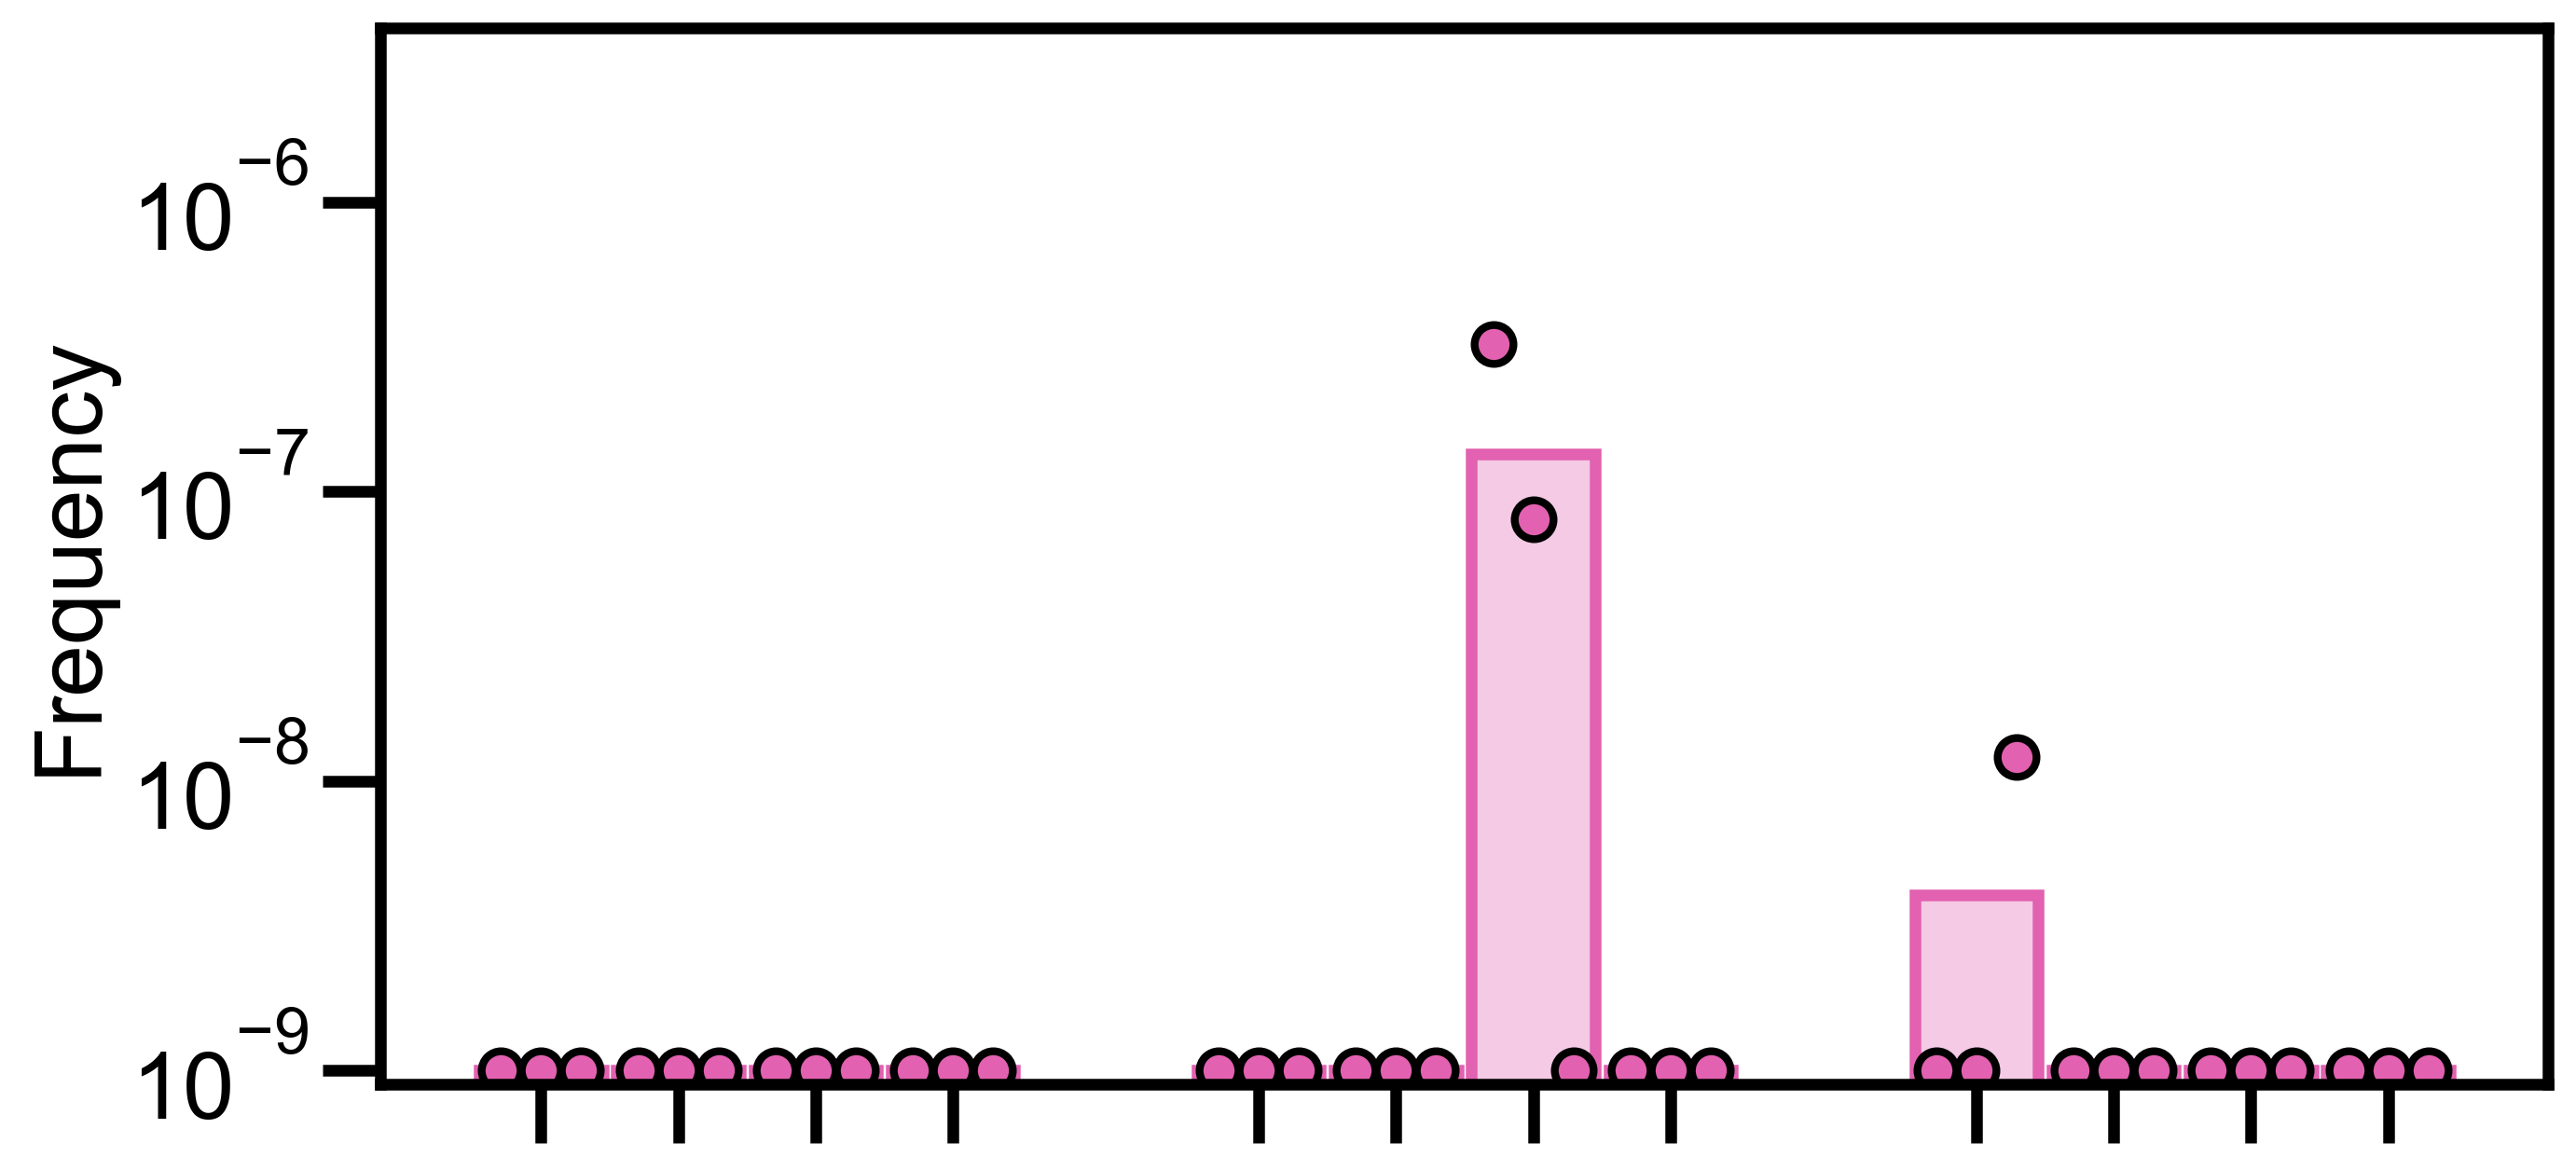

In [25]:
HG='F_HG'
neg='F_neg'
pos='F_pos'
title='F_distr.pdf'
ec=darks[4]
fc=pastels[4]
# fc2=pastels[0]
# ec2=darks[0]
fs=24

fig, ax=plt.subplots(figsize=(10,5), dpi=300)
d=.19
ms=10
lw=3
mew=2
w=.65
mfc=ec
mc='black'

x=3.4

for i, name in zip(w*np.arange(4), ['A', 'C', 'G', 'T']):
    ax.bar(i, df.loc[df['sample']==neg, name+'_aver'], facecolor=fc, edgecolor=ec, width=w*.9, linewidth=lw)
    ax.plot(i-d, df.loc[df['sample']==neg, name+'1'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
    ax.plot(i, df.loc[df['sample']==neg, name+'2'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
    ax.plot(i+d, df.loc[df['sample']==neg, name+'3'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)

for i, name in zip(x+w*np.arange(4), ['A', 'C', 'G', 'T']):
    ax.bar(i, df.loc[df['sample']==pos, name+'_aver'], facecolor=fc, edgecolor=ec, width=w*.9, linewidth=lw)
    ax.plot(i-d, df.loc[df['sample']==pos, name+'1'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
    ax.plot(i, df.loc[df['sample']==pos, name+'2'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
    ax.plot(i+d, df.loc[df['sample']==pos, name+'3'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
    
for i, name in zip(2*x+w*np.arange(4), ['A', 'C', 'G', 'T']):
    ax.bar(i, df.loc[df['sample']==HG, name+'_aver'], facecolor=fc, edgecolor=ec, width=w*.9, linewidth=lw)
    ax.plot(i-d, df.loc[df['sample']==HG, name+'1'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
    ax.plot(i, df.loc[df['sample']==HG, name+'2'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
    ax.plot(i+d, df.loc[df['sample']==HG, name+'3'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
    
# ax.set_xlim(-2*w, 2*x-w)
xticks=[0, w, 2*w, 3*w, x, x+w, x+2*w, x+3*w, 2*x, 2*x+w, 2*x+2*w, 2*x+3*w]
ax.set_xticks(xticks)
ax.set_xticklabels([])
# ax.set_xticklabels(['A', 'C', 'G', 'T', 'mut', 'A', 'C', 'G', 'T', 'mut'])
ax.set_yscale('log')
ax.set_ylim(baseline*.9, 4e-6)

# ax.set_yticklabels(['$0$','$10^{-8}$','$10^{-7}$','$10^{-6}$','$10^{-5}$']) #change manually
ax.set_yticks([1e-9, 1e-8, 1e-7, 1e-6]) #change manually
ax.tick_params(which='major', direction='out', length=15, width=3)
ax.tick_params(which='minor', direction='out', length=0, width=3)
ax.tick_params(axis='both', which='major', labelsize=fs)
ax.set_ylabel('Frequency', fontsize=fs, fontname='Arial')

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(lw)
    ax.spines[axis].set_color('black')
    
# labels = ax.get_yticks()
# labels[0]=0
# ax.annotate('0', xy=(-2*w, baseline), xytext=(-4*w, baseline/1.3), fontsize=fs)
    
for tick in ax.get_xticklabels():
    tick.set_fontname('Arial')
    tick.set_fontsize(fs)
for tick in ax.get_yticklabels():
    tick.set_fontname('Arial')
    tick.set_fontsize(fs)
    
plt.show()
plt.tight_layout()
# fig.savefig('SNP_'+title, bbox_inches='tight')
plt.close()

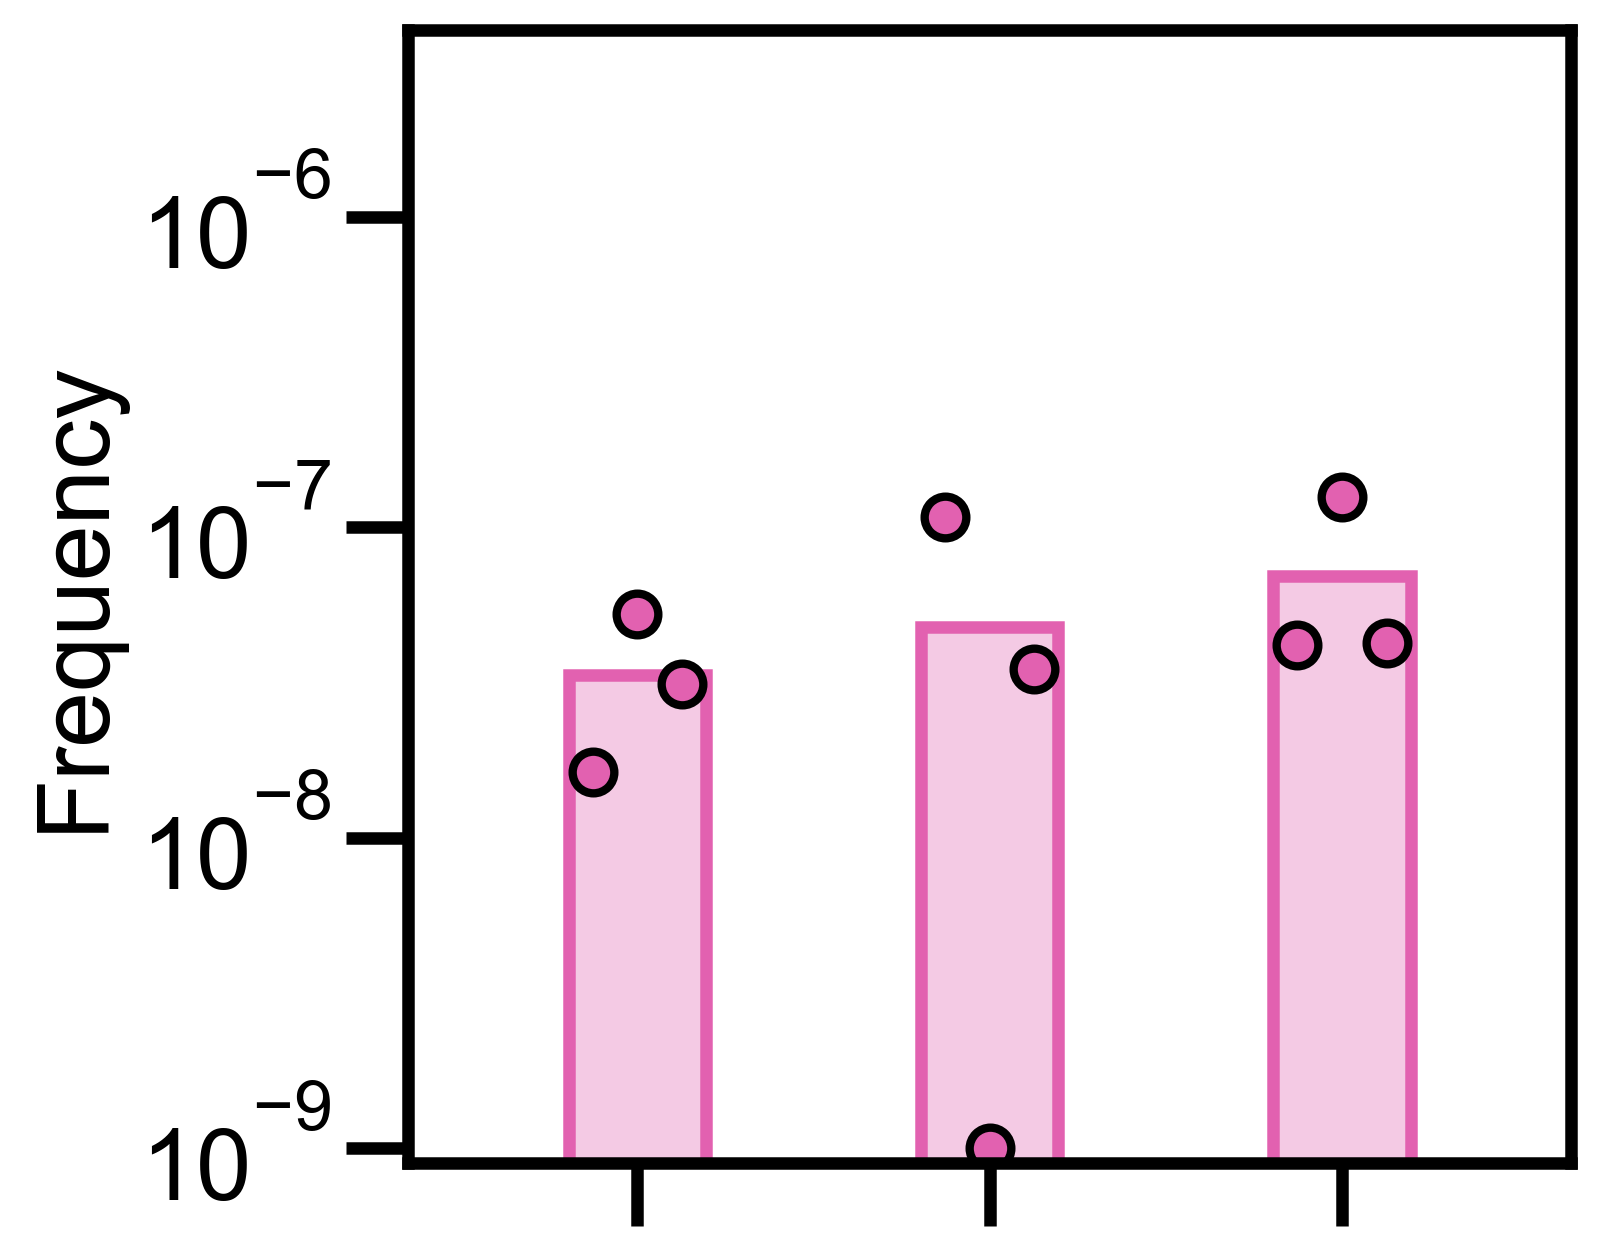

In [26]:
HG='F_HG'
neg='F_neg'
pos='F_pos'
title='F_distr.pdf'
ec=darks[4]
fc=pastels[4]
# fc2=pastels[0]
# ec2=darks[0]
fs=24

fig, ax=plt.subplots(figsize=(5,5), dpi=300)



i=0
ax.bar(i, df.loc[df['sample']==neg, 'd_aver'], facecolor=fc, edgecolor=ec, width=w*.9, linewidth=lw)
ax.plot(i-d, df.loc[df['sample']==neg, 'd1'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
ax.plot(i, df.loc[df['sample']==neg, 'd2'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
ax.plot(i+d, df.loc[df['sample']==neg, 'd3'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)

i=1.5
ax.bar(i, df.loc[df['sample']==pos,'d_aver'], facecolor=fc, edgecolor=ec, width=w*.9, linewidth=lw)
ax.plot(i-d, df.loc[df['sample']==pos, 'd1'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
ax.plot(i, df.loc[df['sample']==pos,'d2'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
ax.plot(i+d, df.loc[df['sample']==pos,'d3'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
    
i=3
ax.bar(i, df.loc[df['sample']==HG,'d_aver'], facecolor=fc, edgecolor=ec, width=w*.9, linewidth=lw)
ax.plot(i-d, df.loc[df['sample']==HG, 'd1'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
ax.plot(i, df.loc[df['sample']==HG,'d2'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
ax.plot(i+d, df.loc[df['sample']==HG, 'd3'], 'o', mfc=ec, mec='black', markersize=ms, mew=mew)
    
ax.set_xlim(-1.5*w, 3+1.5*w)
ax.set_xticks([0, 1.5, 3])
ax.set_xticklabels([])
ax.set_yscale('log')
ax.set_ylim(baseline*.9, 4e-6)

ax.set_yticks([1e-9, 1e-8, 1e-7, 1e-6]) #change manually
ax.tick_params(which='major', direction='out', length=15, width=3)
ax.tick_params(which='minor', direction='out', length=0, width=3)
ax.tick_params(axis='both', which='major', labelsize=fs)
ax.set_ylabel('Frequency', fontsize=fs, fontname='Arial')

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(lw)
    ax.spines[axis].set_color('black')
    
for tick in ax.get_xticklabels():
    tick.set_fontname('Arial')
    tick.set_fontsize(fs)
for tick in ax.get_yticklabels():
    tick.set_fontname('Arial')
    tick.set_fontsize(fs)
    
plt.show()
plt.tight_layout()
# fig.savefig('del_'+title, bbox_inches='tight')
plt.close()